# Analyzing Movie Ratings

In [3]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv("../Data/Best Movies Netflix.csv")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            387 non-null    int64  
 1   TITLE            387 non-null    object 
 2   RELEASE_YEAR     387 non-null    int64  
 3   SCORE            387 non-null    float64
 4   NUMBER_OF_VOTES  387 non-null    int64  
 5   DURATION         387 non-null    int64  
 6   MAIN_GENRE       387 non-null    object 
 7   MAIN_PRODUCTION  387 non-null    object 
 8   Unnamed: 8       0 non-null      float64
dtypes: float64(2), int64(4), object(3)
memory usage: 27.3+ KB


In [46]:
df.describe()

,index,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,Unnamed: 8
count,387.000000,387.000000,387.000000,3.870000e+02,387.000000,0.0
mean,193.000000,2011.023256,7.509044,1.365206e+05,123.395349,NaN
std,111.861522,10.813874,0.441906,2.342114e+05,28.371632,NaN
min,0.000000,1954.000000,6.900000,1.013900e+04,28.000000,NaN
25%,96.500000,2008.000000,7.100000,2.051250e+04,103.500000,NaN
50%,193.000000,2014.000000,7.400000,4.520000e+04,122.000000,NaN
75%,289.500000,2018.000000,7.800000,1.534855e+05,139.000000,NaN
max,386.000000,2022.000000,9.000000,2.268288e+06,229.000000,NaN


In [47]:
df.head()

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION,Unnamed: 8
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB,NaN
1,1,Inception,2010,8.8,2268288,148,scifi,GB,NaN
2,2,Forrest Gump,1994,8.8,1994599,142,drama,US,NaN
3,3,Anbe Sivam,2003,8.7,20595,160,comedy,IN,NaN
4,4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US,NaN


In [48]:
df = df.drop('Unnamed: 8', axis=1) 
df.isna().sum()

index              0
TITLE              0
RELEASE_YEAR       0
SCORE              0
NUMBER_OF_VOTES    0
DURATION           0
MAIN_GENRE         0
MAIN_PRODUCTION    0
dtype: int64

In [49]:
df.shape

(387, 8)

- We have has 387 rows, 8 columns.
- We have no missing values in director.

In [50]:
df.columns

Index(['index', 'TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES',
       'DURATION', 'MAIN_GENRE', 'MAIN_PRODUCTION'],
      dtype='object')

## Correlation Analysis:

In [31]:
# Correlation coefficients between the numeric columns.
correlation_matrix = df[['RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES']].corr()
print(correlation_matrix)

                 RELEASE_YEAR     SCORE  NUMBER_OF_VOTES
RELEASE_YEAR         1.000000 -0.149726        -0.212883
SCORE               -0.149726  1.000000         0.343683
NUMBER_OF_VOTES     -0.212883  0.343683         1.000000


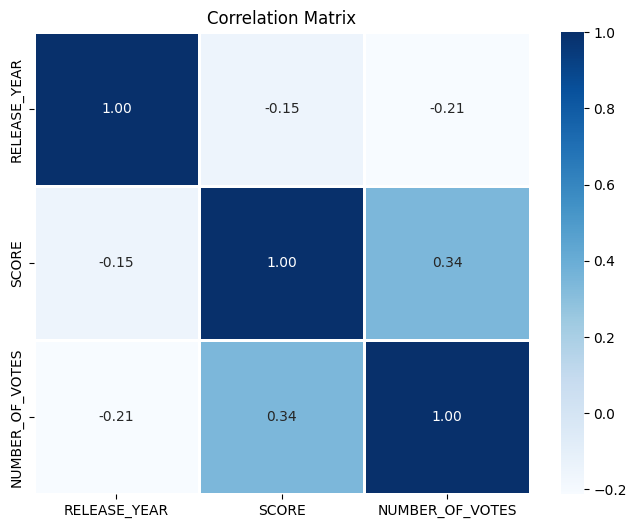

In [32]:
# `figure(figsize=(8, 6))` sets the dimensions of the plot's canvas or figure. 
# The first value (8) represents the width of the figure in inches, and the second value (6) represents the height in inches.
# `annot`: Set to True to display cell values at the center of each cell.
# `cmap`: Determines the color scheme or theme of the plot.
# `fmt`: Controls the number of decimal places displayed in the cell values. For example, `.3f` displays as 0.000, and `.5f` as 0.00000.
# `linewidths`: Adjusts the width of lines that separate each cell.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=1)
plt.title('Correlation Matrix')
plt.show()

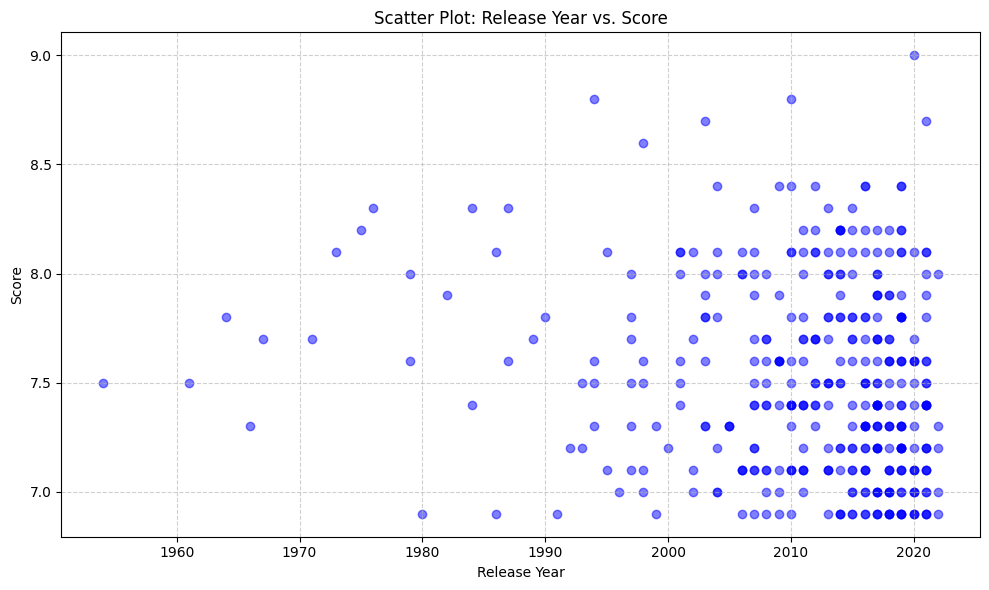

In [33]:
#Scatter plot to visualize the relationship between 'RELEASE_YEAR' and 'SCORE'
plt.figure(figsize=(10, 6))
plt.scatter(df['RELEASE_YEAR'], df['SCORE'], color='blue', marker='o', alpha=0.5)
plt.title('Scatter Plot: Release Year vs. Score')
plt.xlabel('Release Year')
plt.ylabel('Score')
# Customize the grid
plt.grid(True, linestyle='--', alpha=0.6)
# Adjust the subplot parameters for better positioning
plt.tight_layout()
plt.show()

## Time Series Analysis:

### Number Of Movies Released Each Year

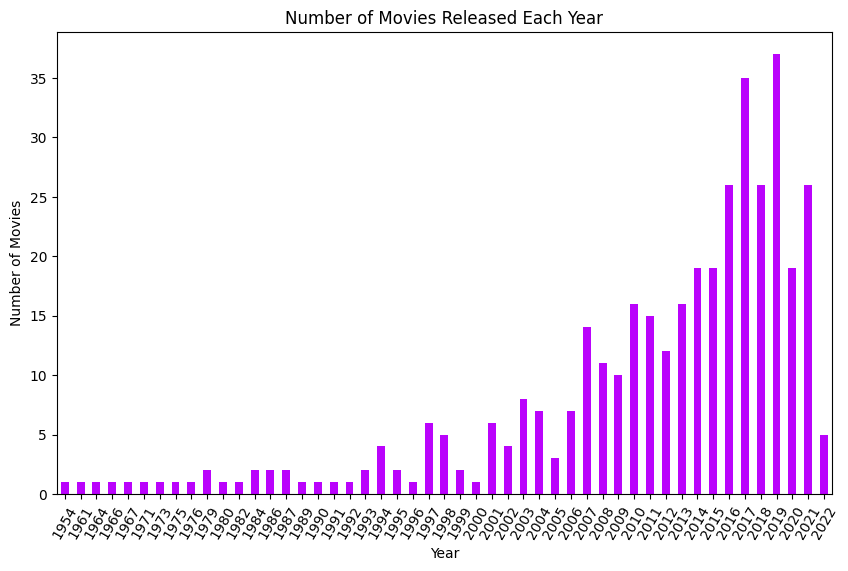

In [34]:
# Formating 'RELEASE_YEAR' column as a datetime or date-like data type
df['RELEASE_YEAR'] = pd.to_datetime(df['RELEASE_YEAR'], format='%Y')
# Grouping the data by a specific column allows us to aggregate and summarize information based on shared values in that column.
# In our case, grouping by 'RELEASE_YEAR' helps us organize movies released in the same year, making it easier to analyze trends and patterns over time.
movie_counts = df.groupby(df['RELEASE_YEAR'].dt.year)['index'].count()

# Create a time series plot for the number of movies released each year
plt.figure(figsize=(10, 6))
movie_counts.plot(kind='bar', color='#ba03fc')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
# Rotates x-axis labels by 60 degrees for better readability.
plt.xticks(rotation=60)
plt.show()

### Average Movie Score Over Time

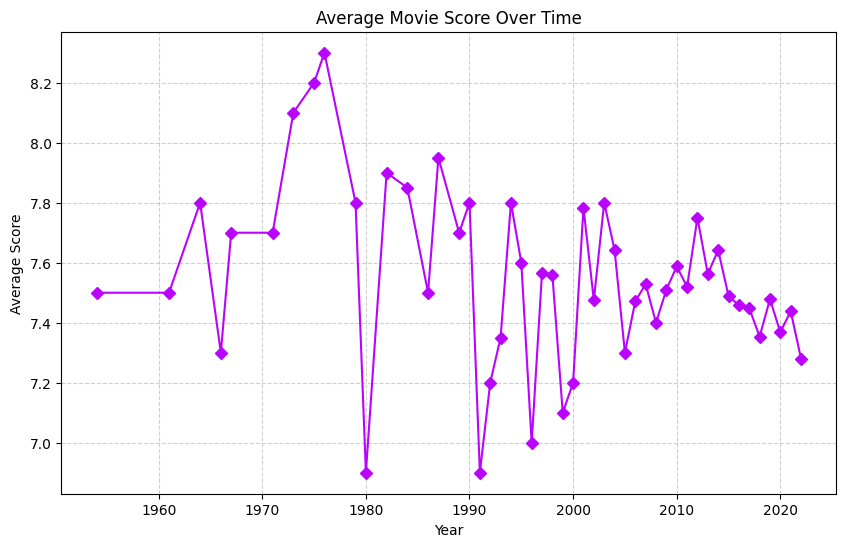

In [35]:
# Group the data by 'RELEASE_YEAR'
grouped_data = df.groupby(df['RELEASE_YEAR'].dt.year)
# Calculate the average score for each year
average_score = grouped_data['SCORE'].mean()

# Create a time series plot for the average score over time
plt.figure(figsize=(10, 6))
average_score.plot(linestyle='-', marker='D', color='#ba03fc')
plt.title('Average Movie Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Total Number of Votes Over Time

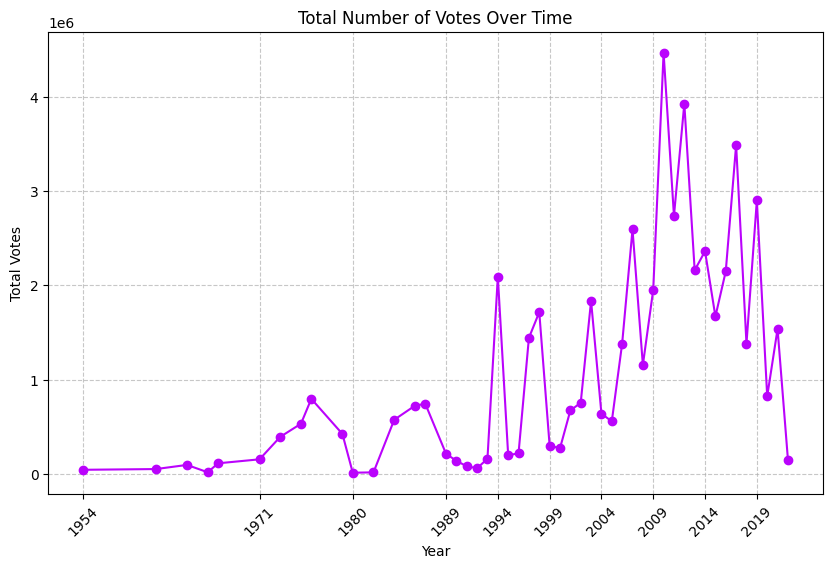

In [36]:
# Calculate the total number of votes for each year
total_votes = grouped_data['NUMBER_OF_VOTES'].sum()
# Create a time series plot for the total number of votes over time
plt.figure(figsize=(10, 6))
total_votes.plot(kind='line', marker='o', color='#ba03fc')
plt.title('Total Number of Votes Over Time')
plt.xlabel('Year')
plt.ylabel('Total Votes')
# Customize x-axis ticks to show every 5 years
plt.xticks(total_votes.index[::5], rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()